Disciplina: Aprendizagem de Máquina

Período: 2025.1

Professor: César Lincoln Cavalcante Mattos

Aluno: Davi Teixeira Silva

## Lista 1 - Regressão linear, polinomial e regularização

### Questão 1

### Considere o conjunto de dados disponível em artificial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para ˆy = f(x).

#### a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

In [1]:
# A biblioteca numpy nos ajuda a trabalhar com arrays e fazer cálculos numéricos com eficiência.
import numpy as np

# Carregando os dados
data = np.genfromtxt('artificial1d.csv', delimiter=',')

# delimiter=',' -> indica que os valores estão separados por vírgula
# O resultado é um array 2D: uma matriz onde cada linha é um par (x, y).

x = data[:, 0] # Seleciona a primeira coluna da matriz (ou seja, todos os valores de x).
y = data[:, 1] # Seleciona a segunda coluna (todos os valores de y).

# Juntar x e y para manter a relação entre eles durante o embaralhamento
combined = np.column_stack((x, y))

np.random.seed(42)  # para reprodutibilidade
np.random.shuffle(combined) # embaralha as linhas.

# Separar novamente x e y
x = combined[:, 0]
y = combined[:, 1]

# Tamanhos
n_total = len(x)

# Definir a proporção de treino (por exemplo, 70% para treino)
train_size = int(0.7 * n_total)

# Definir a proporção de validação (por exemplo, 15% para validação)
val_size = int(0.15 * n_total)

# Definir a proporção de teste (por exemplo, 15% para teste)
test_size = n_total - train_size - val_size # Garante que tudo seja usado

# Dividir os dados

# Pega os primeiros 70% dos dados embaralhados.
x_train = x[:train_size]
y_train = y[:train_size]

# Pega os 15% referentes aos dados embaralhados para validação
x_val = x[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

# pega os 15% restantes para teste.
x_test = x[train_size + val_size:]
y_test = y[train_size + val_size:]


# Verificar
print("Treino:", len(x_train), "amostras")
print("Validação:", len(x_val), "amostras")
print("Teste:", len(x_test), "amostras")

Treino: 21 amostras
Validação: 4 amostras
Teste: 5 amostras


In [2]:
# Função para calcular os coeficientes a (inclinação) e b (intercepto)

# Definimos uma função chamada ols_linear_regression que recebe os vetores x e y.

# ===== 1ª Forma: Reg. Linear Manual OLS =====

def ols_linear_regression(x, y):

    n = len(x) # n é o número de pontos.
    sum_x = np.sum(x) # Soma todos os valores de x
    sum_y = np.sum(y) # Soma todos os valores de y.
    sum_xy = np.sum(x * y) # Soma de cada elemento de x multiplicado pelo seu correspondente em y

    sum_x_squared = np.sum(x * x) # Soma dos quadrados dos elementos de x

    # Fórmula do coeficiente angular da reta (inclinação).
    w_ols = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)

    # Fórmula do intercepto da reta (ponto onde cruza o eixo y).
    b_ols = (sum_y - w_ols * sum_x) / n

    # Retorna os dois coeficientes: w e b.
    return w_ols, b_ols

# Executa a função SOMENTE com os dados de treino e armazena os resultados em w e b.
w_ols, b_ols = ols_linear_regression(x_train, y_train)

print(f"Inclinação (w): {w_ols}")
print(f"Intercepto (b): {b_ols}")

Inclinação (w): 1.4480117793853122
Intercepto (b): -0.004888326232039598


In [3]:
# Previsões (Usamos a equação da reta para prever os valores de y baseando-se em x.)

# Prever os valores de y no conjunto de VALIDAÇÃO
y_pred_val = w_ols * x_val + b_ols

# Prever os valores de y no conjunto de TESTE com a reta ajustada nos dados de treino
y_pred_test = w_ols * x_test + b_ols

# Calculamos o Erro Quadrático Médio (MSE) no conjunto de teste.
# Isso mede quanto os valores previstos (y_pred) se afastam dos reais (y).
mse_val_ols = np.mean((y_val - y_pred_val) ** 2)
mse_test_ols = np.mean((y_test - y_pred_test) ** 2)

# Mostra o valor do erro (MSE).
print(f"[MSE] No conjunto de validação: {mse_val_ols}")
print(f"[MSE] No conjunto de teste: {mse_test_ols}")

# Resíduos
residuos_test = y_test - y_pred_test
print(f"[Resíduos]: {residuos_test}")

# Soma total dos erros quadráticos
soma_erro_quadratico_test = np.sum((y_test - y_pred_test) ** 2)
print(f"[Manual] Soma total dos erros quadráticos (teste): {soma_erro_quadratico_test}")

# ===== 2ª Forma: Fórmula fechada matricial OLS =====

# Preparar matriz X (com coluna de 1s para o intercepto)

# np.ones_like(x_train) cria um vetor de 1s do mesmo tamanho que x_train.
# np.column_stack((x_train, 1s)) cria a matriz XX com duas colunas:
# (1ª coluna: valores de xx, 2ª coluna: tudo 1, para o intercepto.)
X = np.column_stack((x_train, np.ones_like(x_train)))  # shape (n, 2)

# Transforma y_train (vetor 1D) em vetor coluna (matriz de shape (n, 1)), necessário para multiplicações matriciais.
Y = y_train.reshape(-1, 1) # shape (n, 1)

# θ = (XᵀX)^(-1) XᵀY
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

# X.T @ X: Produto da transposta de X com X — resulta em uma matriz 2x2.
# np.linalg.inv(...): Inversão da matriz — parte crítica (não funciona se XᵀX for singular).
# X.T @ Y: Produto da transposta de X com Y, resultando em shape (2, 1).
# O produto final te dá theta (shape 2x1), contendo os dois coeficientes:

w_matrix_ols = theta[0, 0]  # Inclinação
b_matrix_ols = theta[1, 0]  # Intercepto

print(f"[Matriz] Inclinação (w): {w_matrix_ols}")
print(f"[Matriz] Intercepto (b): {b_matrix_ols}")

# Previsão com os coeficientes matriciais no conjunto de teste

# Aplica a equação da reta aos dados de teste
y_pred_matrix = w_matrix_ols * x_test + b_matrix_ols

# Calcula o erro quadrático médio (MSE) entre as previsões e os valores reais do conjunto de teste.
mse_matrix = np.mean((y_test - y_pred_matrix) ** 2)

print(f"[Matriz] MSE Teste: {mse_matrix}")

[MSE] No conjunto de validação: 0.4992936565762847
[MSE] No conjunto de teste: 0.10866274477216956
[Resíduos]: [-0.13220812 -0.43378054  0.15371928  0.55728112  0.0589688 ]
[Manual] Soma total dos erros quadráticos (teste): 0.5433137238608478
[Matriz] Inclinação (w): 1.4480117793853124
[Matriz] Intercepto (b): -0.00488832623203956
[Matriz] MSE Teste: 0.10866274477216949


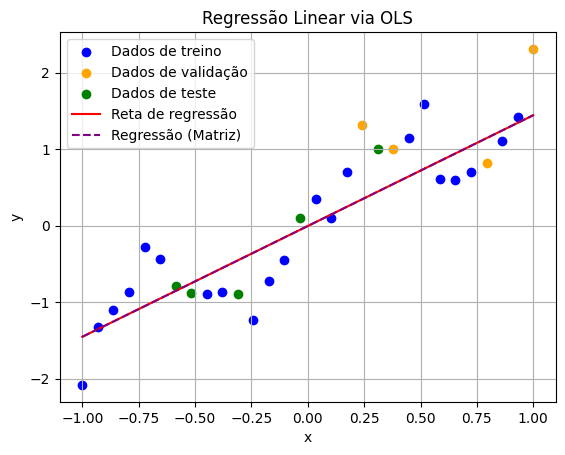

In [4]:
# Importamos a biblioteca matplotlib.pyplot para gerar gráficos.
import matplotlib.pyplot as plt

# Plotar os dados e a reta

# Plota os pontos de treino em azul
plt.scatter(x_train, y_train, color='blue', label='Dados de treino')

# Plota os pontos de validação em laranja
plt.scatter(x_val, y_val, color='orange', label='Dados de validação')

# Plota os pontos de teste em verde
plt.scatter(x_test, y_test, color='green', label='Dados de teste')

# Plota a reta da regressão (varsão manual - valores previstos).
x_line = np.linspace(min(x), max(x), 100)
y_line = w_ols * x_line + b_ols
plt.plot(x_line, y_line, color='red', label='Reta de regressão')

# Reta de regressão (versão matricial - traço pontilhado)
y_line_matrix = w_matrix_ols * x_line + b_matrix_ols
plt.plot(x_line, y_line_matrix, color='purple', linestyle='--', label='Regressão (Matriz)')

# Definem o título do gráfico e nomes dos eixos.
plt.title('Regressão Linear via OLS')
plt.xlabel('x')
plt.ylabel('y')

# Mostra a legenda indicando o que é cada linha/ponto.
plt.legend()

# Adiciona a grade no fundo do gráfico.
plt.grid(True)

# Exibe o gráfico.
plt.show()

#### Observações:

- Observei que as duas retas (manual e matricial) ficaram praticamente idênticas, pois ambas resolvem o mesmo sistema de equações.

#### b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

In [6]:
# Inicialização (w (inclinação) e b (intercepto) com valor 0.)
w_gd = 0.0
b_gd = 0.0

# Define o tamanho do passo que o algoritmo dá na direção do gradiente a cada atualização.
learning_rate = 0.01

# Define o número máximo de épocas (iterações sobre o conjunto de treino).
n_epochs = 1000

patience = 20  # Early stopping se não melhorar por 20 épocas

# Número de amostras de treino. Usado para normalizar o gradiente.
n = len(x_train)

# Armazenar os erros para a curva de aprendizagem
mse_train_history = []  # Lista para guardar a evolução do erro de treino.
mse_val_history = []    # Lista para guardar a evolução do erro de validação.
mse_test_history = []   # Lista para guardar a evolução do erro de teste.

# Inicializa o menor MSE de validação como infinito.
best_val_mse = float('inf')

# Controla o contador para ativar o early stopping.
epochs_without_improvement = 0

# Gradiente Descendente com validação e early stopping
for epoch in range(n_epochs):

    # Previsão e Erro (Treino)
    y_pred_train = w_gd * x_train + b_gd # faz a previsão com os pesos atuais.
    error_train = y_train - y_pred_train # diferença entre rótulo verdadeiro e previsão (resíduo).

    # Previsão e Erro (Teste)
    y_pred_test = w_gd * x_test + b_gd
    error_test = y_test - y_pred_test

    # Previsão e Erro (Validação)
    y_pred_val = w_gd * x_val + b_gd # faz previsão no conjunto de validação.
    error_val = y_val - y_pred_val

    # Gradientes
    dw = (-2 / n) * np.sum(error_train * x_train)
    db = (-2 / n) * np.sum(error_train)

    # Atualização dos parâmetros (ajustando w e b para minimizar o erro.)
    w_gd -= learning_rate * dw
    b_gd -= learning_rate * db

    # Calcular e armazenar MSE (Custo treino, validação e teste)
    mse_train = np.mean(error_train ** 2) # MSE no treino.
    mse_val = np.mean((y_val - y_pred_val) ** 2) #MSE na validação.
    mse_test = np.mean((y_test - y_pred_test) ** 2) #MSE no teste.

    # Salva os valores de MSE para plotar mais tarde.
    mse_train_history.append(mse_train)
    mse_val_history.append(mse_val)
    mse_test_history.append(mse_test)

    # Early stopping
    if mse_val < best_val_mse: #Se o MSE de validação melhorou, salva os melhores w e b.
        best_val_mse = mse_val
        best_w = w_gd
        best_b = b_gd
        epochs_without_improvement = 0
    else: # Caso contrário, incrementa o contador.
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience: # Se patience for atingido, para o treino antes do tempo.
            print(f"Parando antecipadamente na época {epoch + 1}")
            break

# Usar os melhores pesos encontrados
w_gd = best_w
b_gd = best_b

# Faz a previsão no conjunto de teste e calcula o MSE final.
y_test_pred = w_gd * x_test + b_gd
mse_test_gd = np.mean((y_test - y_test_pred) ** 2)

# Resultados
print(f"[GD] Inclinação (w): {w_gd}")
print(f"[GD] Intercepto (b): {b_gd}")
print(f"[GD] MSE Teste: {mse_test_gd}")

[GD] Inclinação (w): 1.4472797411309024
[GD] Intercepto (b): -0.0049597802076458974
[GD] MSE Teste: 0.10876705349529356


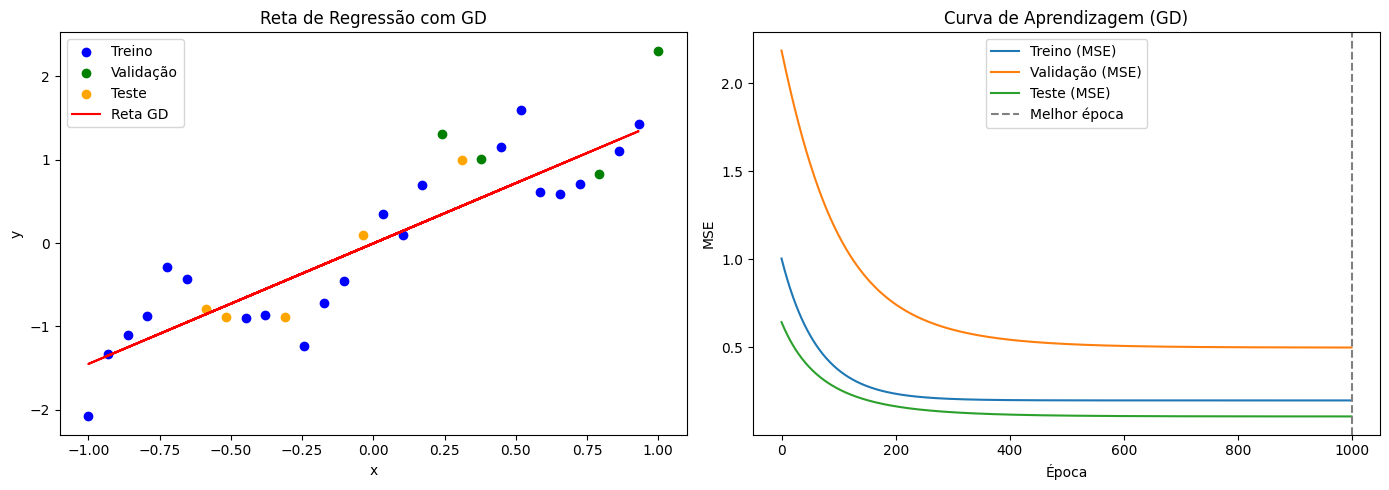

In [14]:
# Plotar reta ajustada

# Cria uma figura com dois subplots lado a lado.
plt.figure(figsize=(14, 5))

# Subplot 1: Reta de regressão
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='blue', label='Treino')
plt.scatter(x_val, y_val, color='green', label='Validação')
plt.scatter(x_test, y_test, color='orange', label='Teste')
plt.plot(x_train, w_gd * x_train + b_gd, color='red', label='Reta GD')
plt.title('Reta de Regressão com GD')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Subplot 2: Curva de aprendizagem
# Plota os MSEs de treino, validação e teste.
# A linha vertical tracejada marca o ponto onde ocorreu o menor erro de validação.
plt.subplot(1, 2, 2)
plt.plot(mse_train_history, label='Treino (MSE)')
plt.plot(mse_val_history, label='Validação (MSE)')
plt.plot(mse_test_history, label='Teste (MSE)')

plt.axvline(len(mse_val_history) - epochs_without_improvement, color='gray', linestyle='--', label='Melhor época')

plt.title('Curva de Aprendizagem (GD)')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

#### c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.

In [15]:
# Normalização dos dados

# Objetivo: Normalizar x para que os dados fiquem com média 0 e desvio padrão 1.
# Isso ajuda no desempenho do SGD, pois evita que valores muito grandes ou muito pequenos prejudiquem a convergência.
# A normalização é feita usando apenas a média e desvio do treino, para simular um cenário real.
x_mean = np.mean(x_train)
x_std = np.std(x_train)

x_train_norm = (x_train - x_mean) / x_std
x_val_norm = (x_val - x_mean) / x_std
x_test_norm = (x_test - x_mean) / x_std

# Inicialização

# Pesos iniciais da regressão linear.
w_sgd = 0.0
b_sgd = 0.0

# Define o "tamanho do passo" nas atualizações.
learning_rate = 0.01

#Quantidade máxima de épocas para treinamento.
n_epochs = 1000

# Número de épocas sem melhora no erro de validação antes de parar.
patience = 20

# Variáveis para histórico e controle

mse_train_history_sgd = []
mse_val_history_sgd = []
mse_test_history = []

best_val_mse = float('inf')
epochs_without_improvement = 0

best_w = w_sgd
best_b = b_sgd


# Gradiente Descendente Estocástico (SGD univariado) Loop com validação e early stopping
for epoch in range(n_epochs):
    # Embaralhar os dados de treino a cada época
    # Isso evita que o modelo aprenda um padrão fixo.
    indices = np.random.permutation(len(x_train_norm))

    x_train_shuffled = x_train_norm[indices]
    y_train_shuffled = y_train[indices]

    # Atualizar os pesos com cada exemplo individual
    for xi, yi in zip(x_train_shuffled, y_train_shuffled):
        # Calcula a predição
        y_pred_i = w_sgd * xi + b_sgd

        # Calcula o erro.
        error_i = yi - y_pred_i

        # Calcula os gradientes
        dw = -2 * xi * error_i
        db = -2 * error_i

        # Atualiza w e b
        w_sgd -= learning_rate * dw
        b_sgd -= learning_rate * db

    # Cálculo do erro da época (após passar por todos os exemplos)

    # Mede o erro no conjunto de treino
    y_pred_train = w_sgd * x_train_norm + b_sgd
    mse_train = np.mean((y_train - y_pred_train) ** 2)

    # Mede o erro no conjunto de validação
    y_pred_val = w_sgd * x_val_norm + b_sgd
    mse_val = np.mean((y_val - y_pred_val) ** 2)

    # Mede o erro no conjunto de teste
    y_pred_test = w_sgd * x_test_norm + b_sgd
    mse_test = np.mean((y_test - y_pred_test) ** 2)

    # Armazena esses erros para gerar o gráfico depois.
    mse_train_history_sgd.append(mse_train)
    mse_val_history_sgd.append(mse_val)
    mse_test_history.append(mse_test)

    # Early stopping
    if mse_val < best_val_mse:
        best_val_mse = mse_val
        best_w = w_sgd
        best_b = b_sgd
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"SGD: Parando antecipadamente na época {epoch + 1}")
            break

# Usar os melhores pesos encontrados
w_sgd = best_w
b_sgd = best_b

# MSE no conjunto de teste normalizado (Mede o erro final para avaliar generalização.)
y_test_pred_sgd = w_sgd * x_test_norm + b_sgd
mse_test_sgd = np.mean((y_test - y_test_pred_sgd) ** 2)

# Resultados
print(f"[SGD Univariado] Inclinação (w): {w_sgd}")
print(f"[SGD Univariado] Intercepto (b): {b_sgd}")
print(f"[SGD Univariado] MSE Teste: {mse_test_sgd}")

SGD: Parando antecipadamente na época 49
[SGD Univariado] Inclinação (w): 0.9075460388645528
[SGD Univariado] Intercepto (b): -0.08022393845611862
[SGD Univariado] MSE Teste: 0.10434248914600208


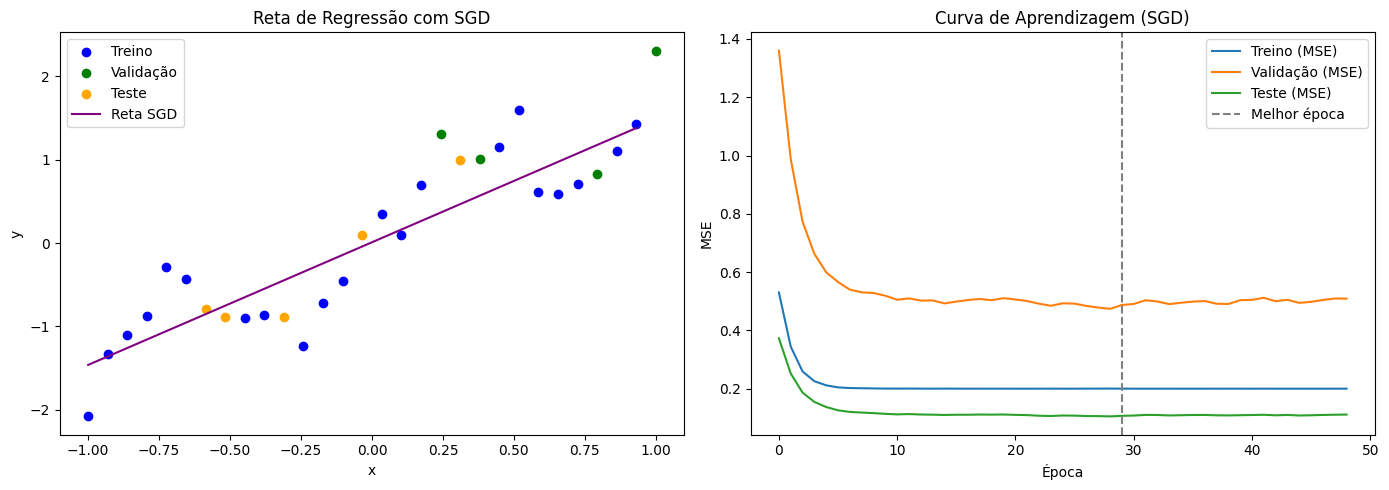

In [16]:
# Plotagem
plt.figure(figsize=(14, 5))

# Subplot 1: Reta ajustada
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='blue', label='Treino')
plt.scatter(x_val, y_val, color='green', label='Validação')
plt.scatter(x_test, y_test, color='orange', label='Teste')

# A reta é plotada usando os dados normalizados convertidos de volta para o domínio original
x_plot = np.linspace(min(x_train), max(x_train), 100)
x_plot_norm = (x_plot - x_mean) / x_std
y_plot = w_sgd * x_plot_norm + b_sgd

plt.plot(x_plot, y_plot, color='purple', label='Reta SGD')
plt.title('Reta de Regressão com SGD')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Subplot 2: Curva de aprendizagem
# Mostra como o erro evoluiu com o tempo.
plt.subplot(1, 2, 2)
plt.plot(mse_train_history_sgd, label='Treino (MSE)')
plt.plot(mse_val_history_sgd, label='Validação (MSE)')
plt.plot(mse_test_history, label='Teste (MSE)')
# A linha vertical mostra a melhor época antes do early stopping.
plt.axvline(len(mse_val_history_sgd) - epochs_without_improvement, color='gray', linestyle='--', label='Melhor época')
plt.title('Curva de Aprendizagem (SGD)')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

#### Observações:

- Observei que, como o SGD atualiza os pesos amostra por amostra (em vez de usar o conjunto todo como no GD tradicional), pude notar que a ordem de atualização influencia diretamente a trajetória do aprendizado e, por consequência, o resultado final.

In [21]:
# Criar X com múltiplas features
X_train = np.column_stack([x_train, x_train ** 2])
X_val = np.column_stack([x_val, x_val ** 2])
X_test = np.column_stack([x_test, x_test ** 2])

# Normalizar cada feature com média e desvio do treino
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_norm = (X_train - X_mean) / X_std
X_val_norm = (X_val - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std

# Inicialização dos pesos (um peso para cada feature)
w_multi_sgd = np.zeros(X_train.shape[1])
b_multi_sgd = 0.0

mse_train_history_multi_sgd = []
mse_val_history_multi_sgd = []

best_val_mse_multi_sgd = float('inf')
epochs_without_improvement_multi_sgd = 0

best_w_multi_sgd = w_multi_sgd.copy()
best_b_multi_sgd = b_multi_sgd

# Treinamento SGD múltiplo
for epoch in range(n_epochs):
    indices = np.random.permutation(len(X_train_norm))
    X_shuffled = X_train_norm[indices]
    y_shuffled = y_train[indices]

    for xi, yi in zip(X_shuffled, y_shuffled):
        y_pred_i = np.dot(w_multi_sgd, xi) + b_multi_sgd
        error_i = yi - y_pred_i

        dw = -2 * xi * error_i
        db = -2 * error_i

        w_multi_sgd -= learning_rate * dw
        b_multi_sgd -= learning_rate * db

    # Avaliação
    y_pred_train = np.dot(X_train_norm, w_multi_sgd) + b_multi_sgd
    y_pred_val = np.dot(X_val_norm, w_multi_sgd) + b_multi_sgd

    mse_train = np.mean((y_train - y_pred_train) ** 2)
    mse_val = np.mean((y_val - y_pred_val) ** 2)

    mse_train_history_multi_sgd.append(mse_train)
    mse_val_history_multi_sgd.append(mse_val)

    if mse_val < best_val_mse_multi_sgd:
        best_val_mse_multi_sgd = mse_val
        best_w_multi_sgd = w_multi_sgd.copy()
        best_b_multi_sgd = b_multi_sgd
        epochs_without_improvement_multi_sgd = 0
    else:
        epochs_without_improvement_multi_sgd += 1
        if epochs_without_improvement_multi_sgd >= patience:
            print(f"SGD (Múltiplo): Early stopping na época {epoch + 1}")
            break

# Melhor modelo múltiplo
w_multi_sgd = best_w_multi_sgd
b_multi_sgd = best_b_multi_sgd

y_test_pred_multi_sgd = np.dot(X_test_norm, w_multi_sgd) + b_multi_sgd
mse_test_multi_sgd = np.mean((y_test - y_test_pred_multi_sgd) ** 2)

# Resultados
print(f"[SGD Múltiplo] Inclinação (w): {w_multi_sgd}")
print(f"[SGD Múltiplo] Intercepto (b): {b_multi_sgd}")
print(f"[SGD Múltiplo] MSE Teste: {mse_test_multi_sgd}")

SGD (Múltiplo): Early stopping na época 36
[SGD Múltiplo] Inclinação (w): [0.99159835 0.02336762]
[SGD Múltiplo] Intercepto (b): 0.09763244943049401
[SGD Múltiplo] MSE Teste: 0.12356972587954348


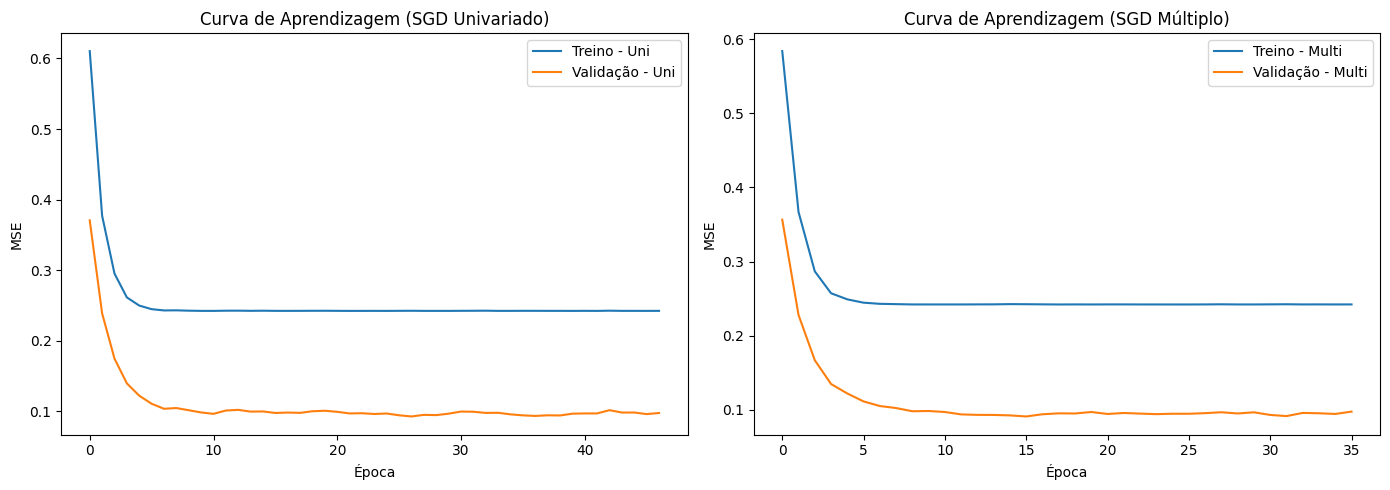

In [22]:
plt.figure(figsize=(14, 5))

# Curva de aprendizagem Univariado
plt.subplot(1, 2, 1)
plt.plot(mse_train_history_sgd, label='Treino - Uni')
plt.plot(mse_val_history_sgd, label='Validação - Uni')
plt.title('Curva de Aprendizagem (SGD Univariado)')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

# Curva de aprendizagem Múltiplo
plt.subplot(1, 2, 2)
plt.plot(mse_train_history_multi_sgd, label='Treino - Multi')
plt.plot(mse_val_history_multi_sgd, label='Validação - Multi')
plt.title('Curva de Aprendizagem (SGD Múltiplo)')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

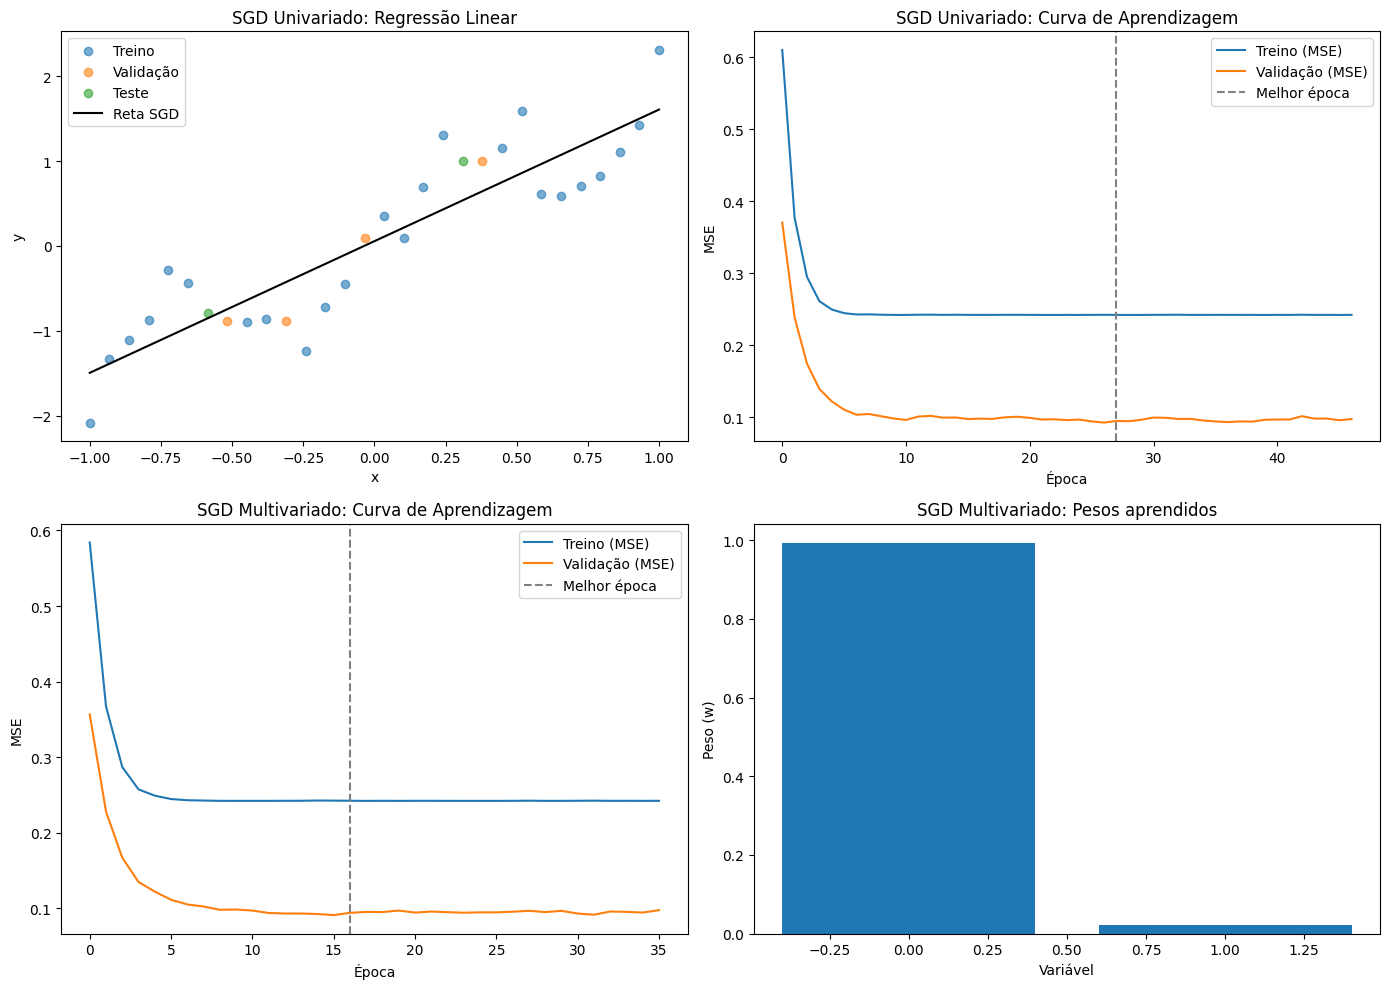

In [24]:
plt.figure(figsize=(14, 10))

# Univariado: Reta
plt.subplot(2, 2, 1)
plt.scatter(x_train, y_train, label='Treino', alpha=0.6)
plt.scatter(x_val, y_val, label='Validação', alpha=0.6)
plt.scatter(x_test, y_test, label='Teste', alpha=0.6)
x_plot = np.linspace(min(x_train), max(x_train), 100)
x_plot_norm = (x_plot - x_mean) / x_std
y_plot = w_sgd * x_plot_norm + b_sgd
plt.plot(x_plot, y_plot, color='black', label='Reta SGD')
plt.title('SGD Univariado: Regressão Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Univariado: Curva de aprendizagem
plt.subplot(2, 2, 2)
plt.plot(mse_train_history_sgd, label='Treino (MSE)')
plt.plot(mse_val_history_sgd, label='Validação (MSE)')
plt.axvline(len(mse_val_history_sgd) - epochs_without_improvement, color='gray', linestyle='--', label='Melhor época')
plt.title('SGD Univariado: Curva de Aprendizagem')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

# Multivariado: Curva de aprendizagem
plt.subplot(2, 2, 3)
plt.plot(mse_train_history_multi_sgd, label='Treino (MSE)')
plt.plot(mse_val_history_multi_sgd, label='Validação (MSE)')
plt.axvline(len(mse_val_history_multi_sgd) - epochs_without_improvement_multi_sgd, color='gray', linestyle='--', label='Melhor época')
plt.title('SGD Multivariado: Curva de Aprendizagem')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

# OBS: O multivariado não tem gráfico direto da "reta" por ter mais de 2 dimensões.
# Podemos plotar os pesos como barras (só para visualização simples):
plt.subplot(2, 2, 4)
plt.bar(range(len(w_multi_sgd)), w_multi_sgd)
plt.title("SGD Multivariado: Pesos aprendidos")
plt.xlabel("Variável")
plt.ylabel("Peso (w)")

plt.tight_layout()
plt.show()

### Conclusão Questão 1

Na questão 1, pude explorar diferentes algoritmos de regressão linear apresentados em aula para ajustar o modelo de dados fornecido, onde pude avaliar sua performance utilizando o erro quadrático médio (MSE) e observar seus comportamentos por meio da plotagem dos gráficos.

Mesmo que a questão 1 não solicitasse, resolvi semparar os dados em treino, validação e teste - como foi ensinado em sala de aula. Assim pude implementar:

- O método dos Mínimos Quadrados Ordinários (OLS), tanto na forma escalar quanto na forma matricial, identificando os parâmetros do modelo e plotando a reta ajustada sobre os dados.
- Em seguida, o Gradiente Descendente (GD), analisando a evolução do MSE ao longo das épocas (curva de aprendizagem) e comparando visualmente a qualidade do ajuste.
- Depois, o Gradiente Descendente Estocástico (SGD) para a regressão univariada, repetindo a análise de performance e visualização. Também resolvi implementar para o caso multivariado com múltiplas saídas.

Por fim, plotei a comparação grafica dos comportamentos do SGD univariado e multivariado, para observar suas diferenças em termos de convergência e generalização.

### Questão 2

Considere o conjunto de dados disponível em california.csv, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída. Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset.

#### a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%)

In [17]:
import numpy as np

# Carregando os dados do arquivo california.csv
data = np.loadtxt('california.csv', delimiter=',')

# Separando os atributos (colunas 0 a 7) e a saída (coluna 8)
X = data[:, :-1]  # 8 primeiras colunas
y = data[:, -1]   # última coluna

# Embaralhando os dados com a mesma ordem para X e y
np.random.seed(42)  # para reprodutibilidade
indices = np.random.permutation(len(X))
X_shuffled = X[indices]
y_shuffled = y[indices]

# Tamanhos
n_total = len(X_shuffled)
train_size = int(0.7 * n_total)
val_size = int(0.15 * n_total)
test_size = n_total - train_size - val_size  # Garante uso total dos dados

# Dividindo os dados
X_train = X_shuffled[:train_size]
y_train = y_shuffled[:train_size]

X_val = X_shuffled[train_size:train_size + val_size]
y_val = y_shuffled[train_size:train_size + val_size]

X_test = X_shuffled[train_size + val_size:]
y_test = y_shuffled[train_size + val_size:]

# ========== NORMALIZAÇÃO ==========

# Normalizando X com Min-Max usando apenas o treino
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)
X_range = X_max - X_min    # diferença entre o maior e o menor valor de cada coluna do X_train
X_range[X_range == 0] = 1  # Evita divisão por zero

# Normalizando cada atributo (coluna) dos conjuntos de treino, validação e teste
# para que fiquem entre 0 e 1, usando a fórmula de Min-Max Scaling
X_train_norm = (X_train - X_min) / X_range
X_val_norm = (X_val - X_min) / X_range
X_test_norm = (X_test - X_min) / X_range

# Normalizando y com StandardScaler (média e desvio) usando apenas o treino
y_mean = y_train.mean() # média do y_train
y_std = y_train.std()   # desvio padrão do y_train
if y_std == 0:
    y_std = 1  # Evita divisão por zero

# Padronização da saída y (StandardScaler)
# para que tenham média 0 e desvio padrão 1,
# usando a fórmula de Z-score
y_train_std = (y_train - y_mean) / y_std
y_val_std = (y_val - y_mean) / y_std
y_test_std = (y_test - y_mean) / y_std

# Função para desnormalizar y
def desnormalize_y(y_normalized):
    return y_normalized * y_std + y_mean

# Verificando as dimensões dos conjuntos

# Treino
print("\n[Conj. de Treino] X_train_norm:", X_train_norm.shape)
print("[Conj. de Treino] y_train_std:", y_train_std.shape)

# Validação
print("\n[Conj. de Validação] X_val_norm:", X_val_norm.shape)
print("[Conj. de Validação] y_val_std:", y_val_std.shape)

# Teste
print("\n[Conj. de Teste] X_test_norm:", X_test_norm.shape)
print("[Conj. de Teste] y_test:", y_test_std.shape)


[Conj. de Treino] X_train_norm: (700, 8)
[Conj. de Treino] y_train_std: (700,)

[Conj. de Validação] X_val_norm: (150, 8)
[Conj. de Validação] y_val_std: (150,)

[Conj. de Teste] X_test_norm: (150, 8)
[Conj. de Teste] y_test: (150,)


#### **Observação:** Resolvi fazer a divisão dos dados foi feita em 70% para treino, 15% para validação e 15% para teste, com o objetivo de acompanhar melhor o desempenho dos modelos ao longo do processo de treinamento, mesmo que o enunciado pedisse apenas treino e teste.

#### b) Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você pode usar o algoritmo OLS.

In [18]:
# Função para gerar atributos polinomiais até o grau d
def polynomial_features(X, degree):
    # Pega o número de amostras (n_samples) e o número de atributos (n_features) da matriz X
    n_samples, n_features = X.shape

    # Cria uma coluna de uns (bias) para ser o primeiro termo do polinômio.
    X_poly = np.ones((n_samples, 1))  # termo de bias

    # Para cada grau d de 1 até o degree escolhido:
    for d in range(1, degree + 1):
        # Usa np.hstack para concatenar horizontalmente os novos atributos à matriz X_poly.
        X_poly = np.hstack([X_poly, X ** d])

    # Retorna a matriz expandida com os termos polinomiais.
    return X_poly

# Função para ajustar os coeficientes com OLS
def train_ols(X, y):
    # Aplica a fórmula do OLS (Ordinary Least Squares): θ = (X^T X)^-1 X^T y

    # np.linalg.pinv é a pseudo-inversa de XᵀX (mais estável numericamente).
    # Retorna os coeficientes θ do modelo treinado.
    return np.linalg.pinv(X.T @ X) @ X.T @ y

# Armazenar modelos e erros para análise posterior
thetas = []         # Os vetores de coeficientes θ aprendidos.
train_errors = []   # O erro de treino (MSE).
val_errors = []     # O erro de validação (MSE).
test_errors = []     # O erro de teste (MSE).

# RMSE para treino, teste e validação
rmse_train = []
rmse_test = []
rmse_val = []

# Testar modelos de grau 1 a 13
for degree in range(1, 14):
    # Gerar atributos polinomiais
    # Expande os atributos normalizados para incluir os termos polinomiais até o grau atual
    X_train_poly = polynomial_features(X_train_norm, degree)
    X_val_poly = polynomial_features(X_val_norm, degree)
    X_test_poly = polynomial_features(X_test_norm, degree)

    # Treinar modelo (OLS) e guarda os coeficientes.
    theta = train_ols(X_train_poly, y_train_std)
    thetas.append(theta)

    # Calcula as previsões multiplicando os atributos expandidos pelo vetor de coeficientes.
    y_train_pred_std = X_train_poly @ theta
    y_val_pred_std = X_val_poly @ theta
    y_test_pred_std = X_test_poly @ theta

    # Erro quadrático médio (MSE) para treino, validação e teste.
    # Isso mede o quão "longe" o modelo está da resposta real.
    mse_train = np.mean((y_train_pred_std - y_train_std) ** 2)
    mse_val = np.mean((y_val_pred_std - y_val_std) ** 2)
    mse_test = np.mean((y_test_pred_std - y_test_std) ** 2)

    # Armazena os erros para cada grau.
    train_errors.append(mse_train)
    val_errors.append(mse_val)
    test_errors.append(mse_test)

    # RMSEs sem regularização (OLS)
    ols_rmse_train = np.sqrt(train_errors)
    ols_rmse_test = np.sqrt(test_errors)

    # RMSE com desnormalização
    y_train_pred = desnormalize_y(y_train_pred_std)
    y_test_pred = desnormalize_y(y_test_pred_std)

    y_train_true = desnormalize_y(y_train_std)
    y_test_true = desnormalize_y(y_test_std)

    rmse_train.append(np.sqrt(np.mean((y_train_pred - y_train_true) ** 2)))
    rmse_test.append(np.sqrt(np.mean((y_test_pred - y_test_true) ** 2)))
    rmse_val.append(np.sqrt(np.mean((y_val_pred_std - y_val_std) ** 2)))

    # Imprime os resultados para cada modelo treinado.
    print(f"Grau {degree}:")
    print(f"  MSE Treino = {mse_train:.4f}, MSE Validação = {mse_val:.4f}, MSE Teste = {mse_test:.4f}")
    print(f"  RMSE Treino = {rmse_train[-1]:.4f}, RMSE Teste = {rmse_test[-1]:.4f}, RMSE Validação = {rmse_val[-1]:.4f}")

Grau 1:
  MSE Treino = 0.3594, MSE Validação = 0.3206, MSE Teste = 0.3310
  RMSE Treino = 0.6820, RMSE Teste = 0.6545, RMSE Validação = 0.5662
Grau 2:
  MSE Treino = 0.3272, MSE Validação = 0.3662, MSE Teste = 0.3623
  RMSE Treino = 0.6508, RMSE Teste = 0.6848, RMSE Validação = 0.6051
Grau 3:
  MSE Treino = 0.3038, MSE Validação = 0.2835, MSE Teste = 0.3426
  RMSE Treino = 0.6271, RMSE Teste = 0.6660, RMSE Validação = 0.5325
Grau 4:
  MSE Treino = 0.2936, MSE Validação = 0.4677, MSE Teste = 0.3166
  RMSE Treino = 0.6165, RMSE Teste = 0.6401, RMSE Validação = 0.6839
Grau 5:
  MSE Treino = 0.2853, MSE Validação = 0.3402, MSE Teste = 0.3163
  RMSE Treino = 0.6077, RMSE Teste = 0.6398, RMSE Validação = 0.5833
Grau 6:
  MSE Treino = 0.2740, MSE Validação = 46.9532, MSE Teste = 0.4683
  RMSE Treino = 0.5955, RMSE Teste = 0.7785, RMSE Validação = 6.8522
Grau 7:
  MSE Treino = 0.2699, MSE Validação = 368.4087, MSE Teste = 0.6339
  RMSE Treino = 0.5911, RMSE Teste = 0.9058, RMSE Validação = 19.

#### c) Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento e no teste para cada modelo. Faça um gráfico para o treino e um gráfico para o teste.

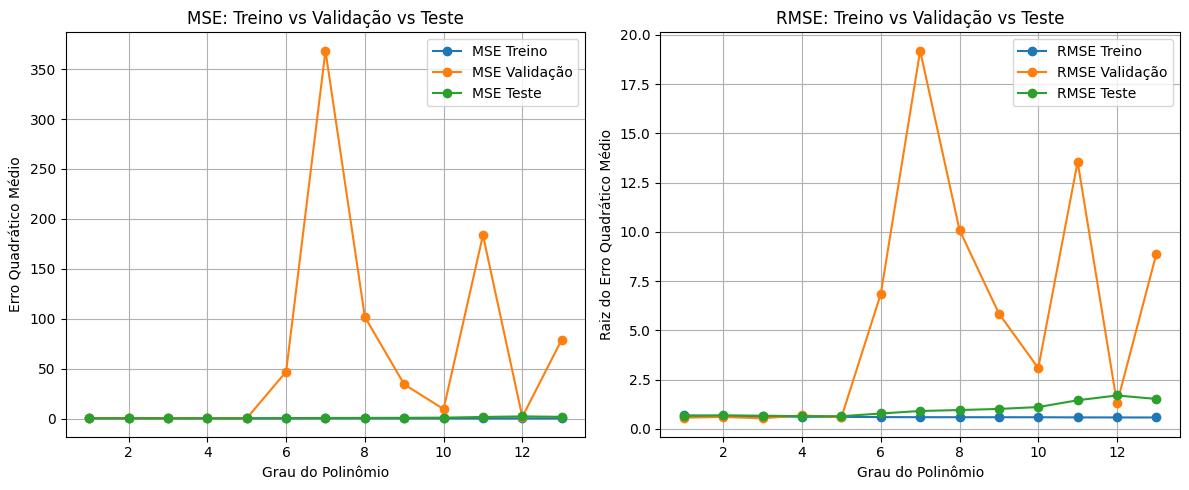

In [19]:
# ========== PLOTAGEM ==========

graus = list(range(1, 14))

# MSE gráfico (treino, validação e teste)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(graus, train_errors, label='MSE Treino', marker='o')
plt.plot(graus, val_errors, label='MSE Validação', marker='o')
plt.plot(graus, test_errors, label='MSE Teste', marker='o')
plt.title('MSE: Treino vs Validação vs Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('Erro Quadrático Médio')
plt.grid(True)
plt.legend()

# RMSE gráfico (treino, validação e teste)
plt.subplot(1, 2, 2)
plt.plot(graus, rmse_train, label='RMSE Treino', marker='o')
plt.plot(graus, rmse_val, label='RMSE Validação', marker='o')
plt.plot(graus, rmse_test, label='RMSE Teste', marker='o')
plt.title('RMSE: Treino vs Validação vs Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('Raiz do Erro Quadrático Médio')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### d) Repita os 2 itens anteriores incluindo um termo de regularização L2 (por exemplo, com fator λ = 0.01).

In [20]:
print("\n========= REGULARIZAÇÃO L2 (Ridge) =========\n")

lambda_l2 = 0.01  # fator de regularização

# Armazenar erros
ridge_train_errors = []
ridge_val_errors = []
ridge_test_errors = []

ridge_rmse_train = []
ridge_rmse_test = []
ridge_rmse_val = []

# Função de treinamento com regularização L2
def train_ridge(X, y, lambd):
    n_features = X.shape[1]
    I = np.eye(n_features)
    return np.linalg.pinv(X.T @ X + lambd * I) @ X.T @ y

# Testar modelos de grau 1 a 13
for degree in range(1, 14):
    # Geração dos atributos polinomiais
    X_train_poly = polynomial_features(X_train_norm, degree)
    X_val_poly = polynomial_features(X_val_norm, degree)
    X_test_poly = polynomial_features(X_test_norm, degree)

    # Treinamento com regularização L2
    theta_ridge = train_ridge(X_train_poly, y_train_std, lambda_l2)

    # Previsões (normalizadas)
    y_train_pred_std = X_train_poly @ theta_ridge
    y_val_pred_std = X_val_poly @ theta_ridge
    y_test_pred_std = X_test_poly @ theta_ridge

    # MSE treino/validação/teste
    mse_train = np.mean((y_train_pred_std - y_train_std) ** 2)
    mse_val = np.mean((y_val_pred_std - y_val_std) ** 2)
    mse_test = np.mean((y_test_pred_std - y_test_std) ** 2)

    ridge_train_errors.append(mse_train)
    ridge_val_errors.append(mse_val)
    ridge_test_errors.append(mse_test)

    # Desnormalizar previsões para RMSE
    y_train_pred = desnormalize_y(y_train_pred_std)
    y_test_pred = desnormalize_y(y_test_pred_std)
    y_val_pred = desnormalize_y(y_val_pred_std)


    y_train_true = desnormalize_y(y_train_std)
    y_test_true = desnormalize_y(y_test_std)
    y_val_true = desnormalize_y(y_val_std)

    rmse_train = np.sqrt(np.mean((y_train_pred - y_train_true) ** 2))
    rmse_test = np.sqrt(np.mean((y_test_pred - y_test_true) ** 2))
    rmse_val = np.sqrt(np.mean((y_val_pred - y_val_true) ** 2))

    ridge_rmse_train.append(rmse_train)
    ridge_rmse_test.append(rmse_test)
    ridge_rmse_val.append(rmse_val)

    print(f"Grau {degree}:")
    print(f"  MSE Treino = {mse_train:.4f}, MSE Validação = {mse_val:.4f}, MSE Teste = {mse_test:.4f}")
    print(f"  RMSE Treino = {rmse_train:.4f}, RMSE Validação = {rmse_val:.4f}, RMSE Teste = {rmse_test:.4f}")



========= REGULARIZAÇÃO L2 (Ridge) =========

Grau 1:
  MSE Treino = 0.3594, MSE Validação = 0.3207, MSE Teste = 0.3311
  RMSE Treino = 0.6820, RMSE Validação = 0.6443, RMSE Teste = 0.6547
Grau 2:
  MSE Treino = 0.3287, MSE Validação = 0.3298, MSE Teste = 0.3408
  RMSE Treino = 0.6523, RMSE Validação = 0.6533, RMSE Teste = 0.6642
Grau 3:
  MSE Treino = 0.3116, MSE Validação = 0.3305, MSE Teste = 0.3465
  RMSE Treino = 0.6351, RMSE Validação = 0.6540, RMSE Teste = 0.6697
Grau 4:
  MSE Treino = 0.3102, MSE Validação = 0.3206, MSE Teste = 0.3462
  RMSE Treino = 0.6337, RMSE Validação = 0.6442, RMSE Teste = 0.6694
Grau 5:
  MSE Treino = 0.3092, MSE Validação = 0.3100, MSE Teste = 0.3451
  RMSE Treino = 0.6326, RMSE Validação = 0.6335, RMSE Teste = 0.6684
Grau 6:
  MSE Treino = 0.3081, MSE Validação = 0.3034, MSE Teste = 0.3449
  RMSE Treino = 0.6316, RMSE Validação = 0.6266, RMSE Teste = 0.6682
Grau 7:
  MSE Treino = 0.3072, MSE Validação = 0.2991, MSE Teste = 0.3449
  RMSE Treino = 0.630

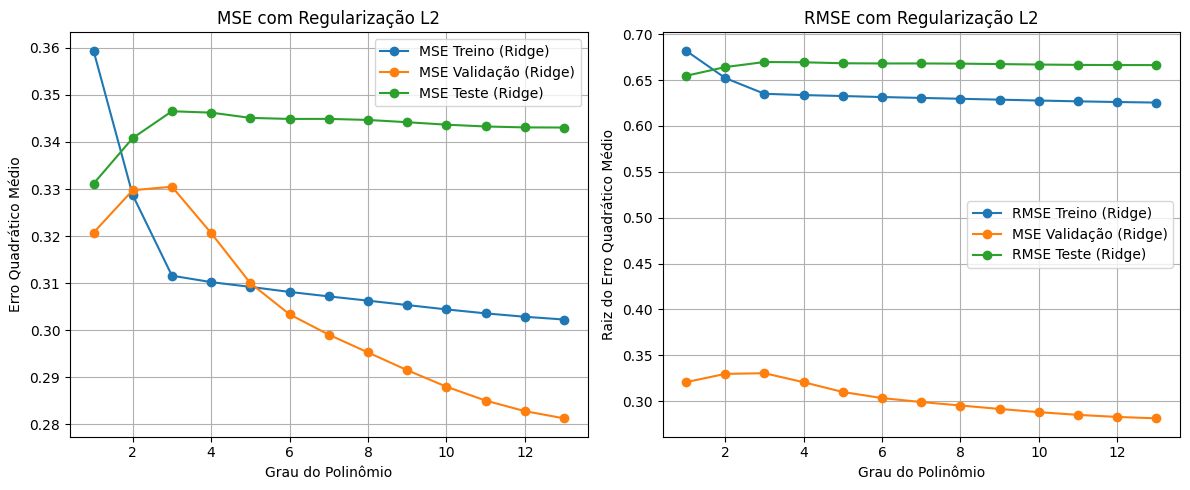

In [21]:
graus = range(1, 14)

plt.figure(figsize=(12, 5))

# MSE - treino, validação e teste
plt.subplot(1, 2, 1)
plt.plot(graus, ridge_train_errors, label='MSE Treino (Ridge)', marker='o')
plt.plot(graus, ridge_val_errors, label='MSE Validação (Ridge)', marker='o')
plt.plot(graus, ridge_test_errors, label='MSE Teste (Ridge)', marker='o')
plt.title('MSE com Regularização L2')
plt.xlabel('Grau do Polinômio')
plt.ylabel('Erro Quadrático Médio')
plt.grid(True)
plt.legend()

# RMSE - treino, validação e teste
plt.subplot(1, 2, 2)
plt.plot(graus, ridge_rmse_train, label='RMSE Treino (Ridge)', marker='o')
plt.plot(graus, ridge_val_errors, label='MSE Validação (Ridge)', marker='o')
plt.plot(graus, ridge_rmse_test, label='RMSE Teste (Ridge)', marker='o')
plt.title('RMSE com Regularização L2')
plt.xlabel('Grau do Polinômio')
plt.ylabel('Raiz do Erro Quadrático Médio')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### Observações:

- Embora a questão solicitasse apenas a divisão dos dados em conjuntos de treino (80%) e teste (20%), para uma abordagem que permitece uma análise mais detalhada do desempenho dos modelos antes da etapa final de teste, resolvi dividir os dados em 70% para treino, 15% para validação e 15% para teste para aprimorar a avaliação dos modelos durante o processo de treinamento.

- Pude observar que a inclusão da regularização L2 com λ = 0.01 ajudou a reduzir o risco de overfitting em modelos de maior grau, além de suavizar o modelo, permitindo melhor generalização nos dados de teste, especialmente a partir dos graus mais altos onde a complexidade tende a crescer muito.

### Gráficos comparativos de RMSE (com e sem L2):

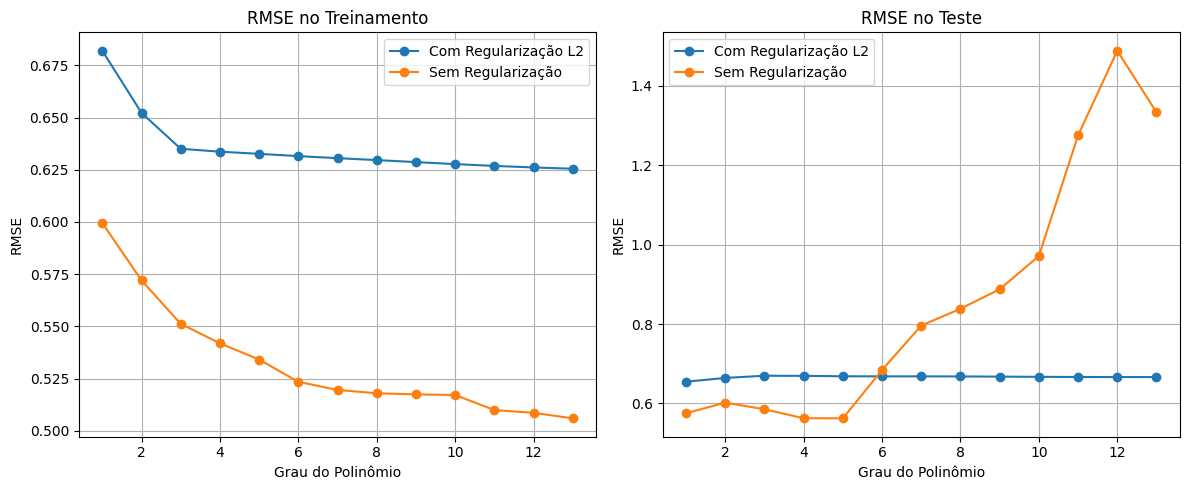

In [73]:
graus = range(1, 14)

plt.figure(figsize=(12, 5))

# RMSE no Treinamento
plt.subplot(1, 2, 1)
plt.plot(graus, ridge_rmse_train, label='Com Regularização L2', marker='o')
plt.plot(graus, ols_rmse_train, label='Sem Regularização', marker='o')
plt.title('RMSE no Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()

# RMSE no Teste
plt.subplot(1, 2, 2)
plt.plot(graus, ridge_rmse_test, label='Com Regularização L2', marker='o')
plt.plot(graus, ols_rmse_test, label='Sem Regularização', marker='o')
plt.title('RMSE no Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


- Esse gráfico ajuda a visualizar claramente como a regularização L2 afeta a performance do modelo, especialmente em modelos com alto grau (onde o overfitting tende a ocorrer).

### Comparação entre modelos com e sem regularização L2 (Ridge)

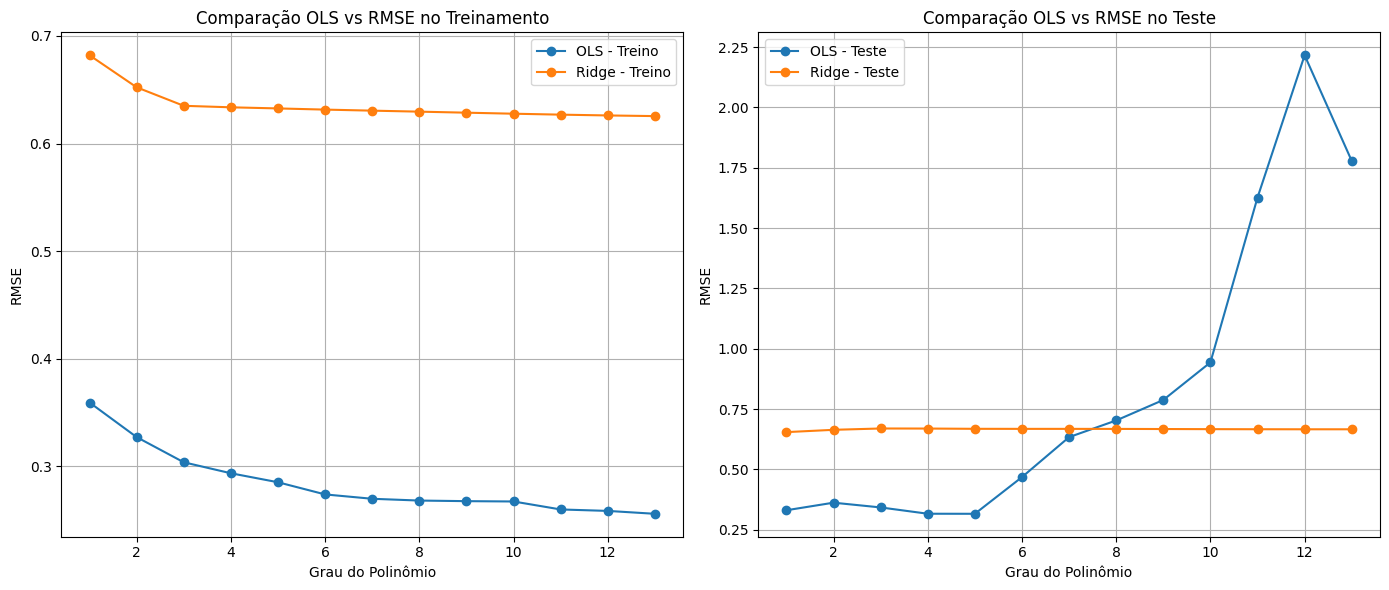

In [74]:
graus = list(range(1, 14))

plt.figure(figsize=(14, 6))

# OLS vs RMSE no Treino
plt.subplot(1, 2, 1)
plt.plot(graus, train_errors, label='OLS - Treino', marker='o')
plt.plot(graus, ridge_rmse_train, label='Ridge - Treino', marker='o')
plt.title('Comparação OLS vs RMSE no Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# OLS vs RMSE no Teste
plt.subplot(1, 2, 2)
plt.plot(graus, test_errors, label='OLS - Teste', marker='o')
plt.plot(graus, ridge_rmse_test, label='Ridge - Teste', marker='o')
plt.title('Comparação OLS vs RMSE no Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Ao comparar os modelos de regressão polinomial com e sem regularização L2, pude observar diferenças no comportamento do erro à medida que o grau do polinômio aumenta:

- Sem regularização (OLS):

  - Para graus baixos, o modelo apresenta desempenho razoável tanto no treino quanto no teste.
  - A partir de certo grau (geralmente após o grau 4 ou 5), o modelo começa a sofrer overfitting, evidenciado por:
    - Erro de treino muito baixo (ajuste excessivo aos dados).
    - Erro de teste alto, mostrando fraca generalização.

- Com regularização L2 (Ridge):
  - A regularização penaliza coeficientes muito grandes, controlando a complexidade do modelo.
  - Isso permite manter a estabilidade do erro mesmo em graus mais altos.
  - O modelo Ridge tende a apresentar erro de treino um pouco maior, mas erro de teste bem menor do que o modelo sem regularização, principalmente em graus elevados.

Conclusão: A regularização L2 foi eficaz para reduzir o overfitting e melhorar a capacidade de generalização do modelo, sendo especialmente útil quando utilizamos polinômios de alto grau.

### Conclusão Geral da Questão 2

Na questão 2, realizei uma análise da regressão polinomial aplicada ao conjunto de dados disponibilizados, onde pude observar a influência do grau do polinômio e do uso de regularização L2 (Ridge Regression) no desempenho do modelo.

- Realizei uma análise com polinômios de grau 1 a 13, onde pude observar que, apesar de graus mais altos ajustarem melhor os dados de treino, o desempenho no conjunto de validação e teste caía drasticamente — evidenciando o overfitting.

- Para contornar esse problema, foi instruído aplicar a regularização L2 (λ = 0.01), que penaliza modelos excessivamente complexos. Os resultados mostraram que o uso de regularização ajudou a controlar o overfitting, melhorando a generalização do modelo e produzindo curvas de erro mais estáveis.